In [12]:
from sympy import *
init_printing()

In [13]:
t = Symbol('t',real = True)
x = Function('x')(t)
v = Function('v')(t)
j = Function('j')(t)
eqv = Eq(v, diff(x, t))
al,be = symbols('alpha beta', real = True)

In [14]:
a = Matrix([j,x,v])
A = Matrix([[-al,0,-1],[0,0,1],[1,0,-be]])
b = Matrix([1,0,0])
u = Function('u')(t)
eq1 = Eq(diff(a,t),A*a+b*u)
eq1

⎡d       ⎤                          
⎢──(j(t))⎥                          
⎢dt      ⎥                          
⎢        ⎥   ⎡-α⋅j(t) + u(t) - v(t)⎤
⎢d       ⎥   ⎢                     ⎥
⎢──(x(t))⎥ = ⎢        v(t)         ⎥
⎢dt      ⎥   ⎢                     ⎥
⎢        ⎥   ⎣   -β⋅v(t) + j(t)    ⎦
⎢d       ⎥                          
⎢──(v(t))⎥                          
⎣dt      ⎦                          

In [39]:
print_latex(a)

\left[\begin{matrix}j{\left(t \right)}\\x{\left(t \right)}\\v{\left(t \right)}\end{matrix}\right]


In [16]:
z = Function('z')(t)
g1,g2 = symbols('g_1 g_2', real = True)
eq2 = Eq(u,g1*(z-x)+g2*(diff(z,t)-v))
eq2

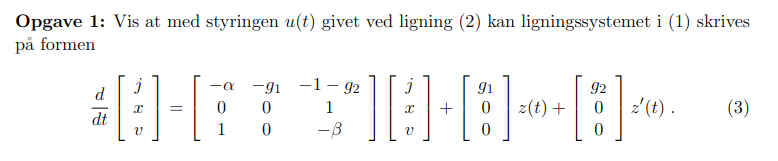

In [17]:
#Opgave 1
eq3 = eq1.subs(u,eq2.rhs)
eq3

⎡d       ⎤                                                               
⎢──(j(t))⎥                                                               
⎢dt      ⎥   ⎡                                 ⎛        d       ⎞       ⎤
⎢        ⎥   ⎢-α⋅j(t) + g₁⋅(-x(t) + z(t)) + g₂⋅⎜-v(t) + ──(z(t))⎟ - v(t)⎥
⎢d       ⎥   ⎢                                 ⎝        dt      ⎠       ⎥
⎢──(x(t))⎥ = ⎢                                                          ⎥
⎢dt      ⎥   ⎢                           v(t)                           ⎥
⎢        ⎥   ⎢                                                          ⎥
⎢d       ⎥   ⎣                      -β⋅v(t) + j(t)                      ⎦
⎢──(v(t))⎥                                                               
⎣dt      ⎦                                                               

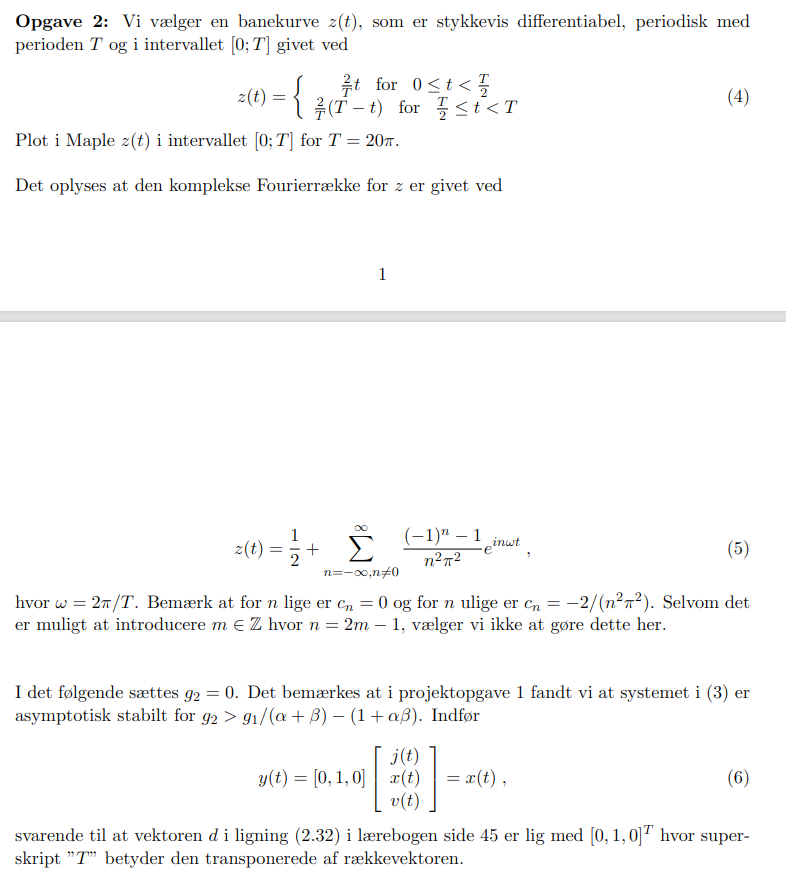

In [18]:
#Opgave 2
T = Symbol('T', real = True)
eq4 = Eq(z,Piecewise((2/T*t,(0<=t)&(t<T/2)),(2/T*(T-t),(t>=T/2)&(t<T))))
eq4

       ⎧   2⋅t                     T
       ⎪   ───     for t ≥ 0 ∧ t < ─
       ⎪    T                      2
z(t) = ⎨                            
       ⎪2⋅(T - t)          T        
       ⎪─────────  for t ≥ ─ ∧ T > t
       ⎩    T              2        

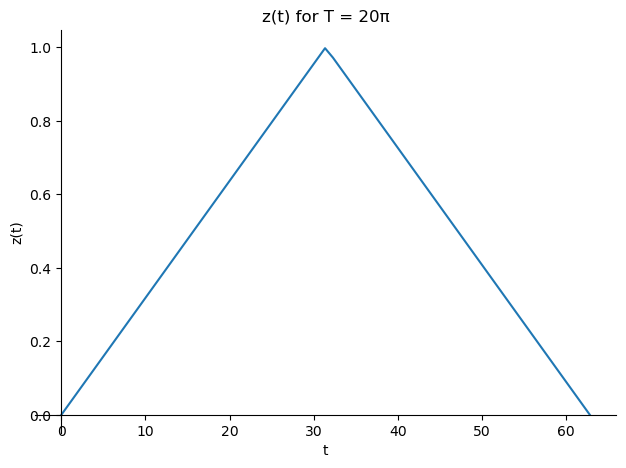

In [71]:
plz = plot(eq4.subs(T,S(20)*pi).rhs,(t,S(0),S(20)*pi),ylabel = 'z(t)',xlabel = 't',title = 'z(t) for T = 20π')

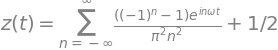

In [20]:
om = Symbol('omega', real = True)
eqom = Eq(om,2*pi/T)
n = Symbol ('n', integer = True)
eq5 = Eq(z,S(1)/2+ Sum(((-1)**n-1)/(n**2*pi**2)*exp(I*n*om*t),(n,-oo,oo)))
eq5

In [21]:
d = Matrix([0,1,0])
y=d.transpose()*a
y

[x(t)]

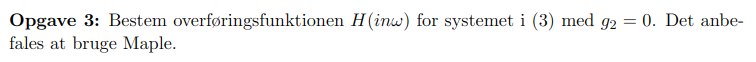

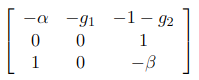

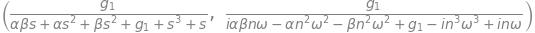

In [22]:
#Opgave 3
s = Symbol('s')
b=Matrix([g1,0,0])
A3 = Matrix([[-al,-g1,-1-g2],[0,0,1],[1,0,-be]]).subs(g2,0)
H = (-d.transpose()*(A3-s*eye(3))**(-1)*b)[0]
Hc = H.subs(s,I*n*om).simplify()
H,Hc

In [41]:
print_latex(Hc)

\frac{g_{1}}{i \alpha \beta n \omega - \alpha n^{2} \omega^{2} - \beta n^{2} \omega^{2} + g_{1} - i n^{3} \omega^{3} + i n \omega}


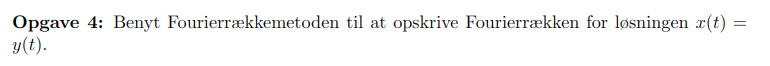

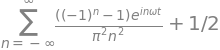

In [24]:
(eq5.rhs)

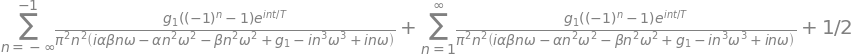

In [25]:
#Opgave 4
c0 = S(1)/2
c = (S(-1)**n-1)/(n**2*pi**2)
y4 = c0 + Sum(c*Hc*exp(I*n*t*om),(n,-oo,-1))+ Sum(c*Hc*exp(I*n*t*om),(n,1,oo))
y4

In [45]:
print_latex(c0*H.subs(s,0) + Sum(c*Hc*exp(I*n*t*om),(n,-oo,oo)).subs(om,2*pi/T))

\sum_{n=-\infty}^{\infty} \frac{g_{1} \left(\left(-1\right)^{n} - 1\right) e^{\frac{2 i \pi n t}{T}}}{\pi^{2} n^{2} \left(g_{1} + \frac{2 i \pi \alpha \beta n}{T} + \frac{2 i \pi n}{T} - \frac{4 \pi^{2} \alpha n^{2}}{T^{2}} - \frac{4 \pi^{2} \beta n^{2}}{T^{2}} - \frac{8 i \pi^{3} n^{3}}{T^{3}}\right)} + \frac{1}{2}


In [26]:
eqom

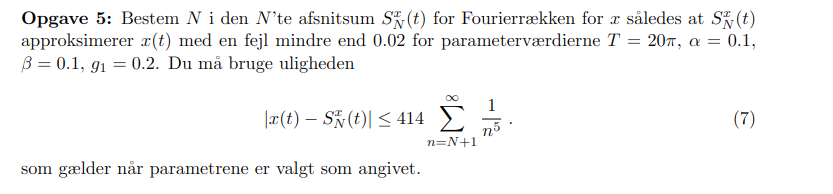

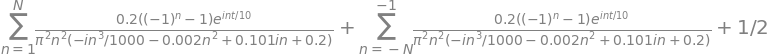

In [27]:
#Opgave 5
ep = 0.02
N = Symbol('N', integer = True)
SN = ((c0*Hc.subs(n,0) + Sum(c*Hc*exp(I*n*t*om),(n,-N,-1))+ Sum(c*Hc*exp(I*n*t*om),(n,1,N))).subs({T:20*pi,al:0.1,be:0.1,g1:0.2,om:2*pi/(20*pi)}))
SN

In [56]:
print_latex((c0*Hc.subs(n,0) + Sum(c*Hc*exp(I*n*t*om),(n,-N,N))).subs({T:20*pi,al:0.1,be:0.1,g1:0.2,om:2*pi/(20*pi)}))

\sum_{n=- N}^{N} \frac{0.2 \left(\left(-1\right)^{n} - 1\right) e^{\frac{i n t}{10}}}{\pi^{2} n^{2} \left(- \frac{i n^{3}}{1000} - 0.002 n^{2} + 0.101 i n + 0.2\right)} + \frac{1}{2}


In [28]:
Hc.subs({T:20*pi,al:0.1,be:0.1,g1:0.2,om:2*pi/(20*pi),n:0})

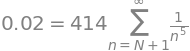

In [29]:
eq7 = Eq(ep,414*Sum(1/n**5,(n,N+1,oo)))
eq7

In [30]:
414*Sum(1/n**5,(n,9,oo)).evalf()

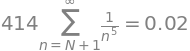

In [31]:
eq7.simplify()

In [32]:
t = Symbol('t',real = True)
t0 = Symbol('t_0',real = True,positive = True)
f = 1/t**5
eq8 = Eq(ep,414*(integrate(f,(t,t0+1,oo))+f.subs(t,t0+1)))
N0 = ceiling(solve(eq8,t0)[0])
N0

In [52]:
solve(eq8,t0)

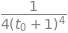

In [50]:
integrate(f,(t,t0+1,oo)).doit().simplify()

In [57]:
SNep = SN.subs(N,9).doit().simplify()
print_latex(SNep)

\frac{\left(\left(\left(-0.0110893701091865 + 0.0525285952540414 i\right) e^{\frac{9 i t}{10}} + \left(-0.0116536467631139 + 0.0415875237428771 i\right) e^{\frac{7 i t}{10}} + \left(-0.148012605469147 + 0.22445867642574 i\right) e^{\frac{3 i t}{10}} + \left(-3.21925046744167 + 1.62588407446549 i\right) e^{\frac{i t}{10}} + \left(-0.0287597363690833 + 0.0728579988016777 i\right) e^{\frac{i t}{2}}\right) e^{\frac{5 i t}{2}} - \left(3.21925046744167 + 1.62588407446549 i\right) e^{\frac{12 i t}{5}} - \left(0.148012605469147 + 0.22445867642574 i\right) e^{\frac{11 i t}{5}} - \left(0.0116536467631139 + 0.0415875237428771 i\right) e^{\frac{9 i t}{5}} - \left(0.0110893701091865 + 0.0525285952540414 i\right) e^{\frac{8 i t}{5}} + \pi^{2} e^{\frac{5 i t}{2}} - \left(0.0287597363690833 + 0.0728579988016777 i\right) e^{2 i t}\right) e^{- \frac{5 i t}{2}}}{2 \pi^{2}}


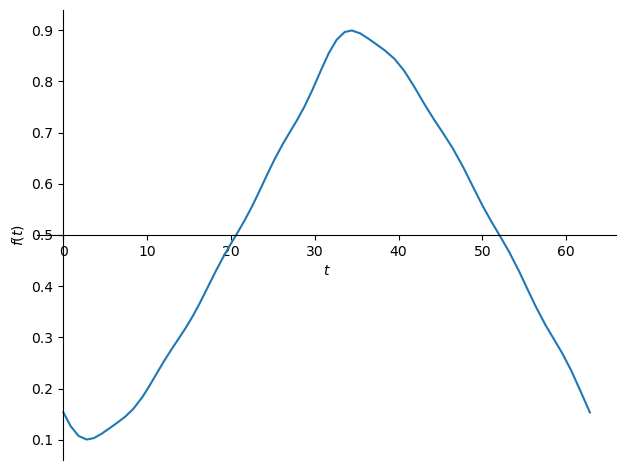

In [75]:
plSN = plot(SNep,(t,0,20*pi))

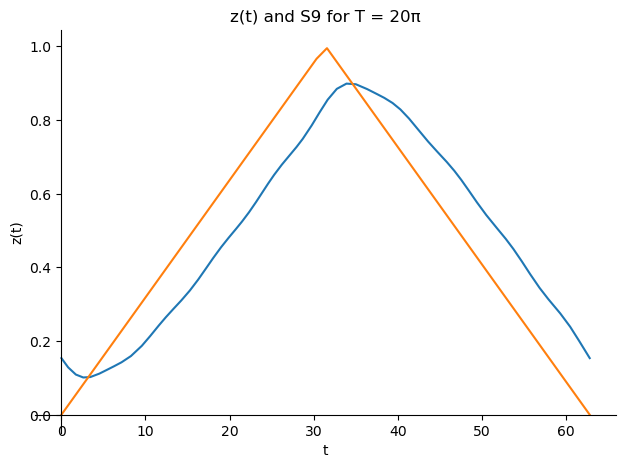

In [79]:
plSN = plot(SNep,(t,0,20*pi),show=False)
plSN.extend(plz)
plSN.ylabel = 'z(t)'
plSN.xlabel = 't'
plSN.title = 'z(t) og S9 for T = 20π'
plSN.show()

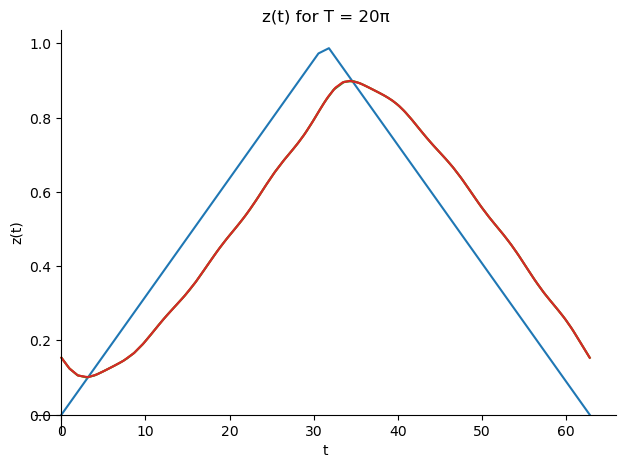

In [70]:
plz.show()